# **The Foundation of Applied Machine Learning**
## Spring 2019

### Instructor: [**Prof. Bahram Mobasher**](http://faculty.ucr.edu/~mobasher/)
### Teaching Assistance: [**Abtin Shahidi**](https://abtinshahidi.github.io/) email *abtin.shahidi--at--email.ucr.edu*

### Course webpage: [https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning](https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning)



<br></br>
# **Week 3**

## Continuing on Statistics and python:





<span style="color:#2227AF">In the following exercise we are going to make some **assumption about data**, **make a model**, and **fit the parameters of the model**:</span>

# **Flip A Coin: Is this Coin Really Fair?**

## Imagine that you want to measure the fairness of a given coin:
### You run the following experiment:
1. You count number of heads per $N=20$ coin toss.
2. You do the previous line 100 times.

And this is the outcome of the experiment:

In [1]:
data_array = [ 6,  7,  8, 11,  8,  7,  8,  9,  8,  5, 12,  7,  5,  8,  8,  8, 10,
               9,  9,  7,  5, 11,  6,  2,  9,  8, 11,  8, 10,  5,  9, 11,  8,  9,
               7,  8,  6,  8, 12,  9, 11,  9,  6,  7, 11,  5,  9,  6,  8, 12,  6,
               8,  7,  8,  8, 11,  5,  6,  6,  7, 12,  9,  7,  8,  9,  7, 11,  7,
               9,  4,  8,  9,  9,  9, 12,  6,  8,  7, 10,  6,  5,  8,  9,  7,  8,
               7,  9,  7,  7, 12,  9, 11,  6,  5,  9,  7,  9,  7, 11,  8]

First we need to come up with a model for the data. We need to find the probability of each outcome first, before getting into the estimation for fairness. Let's ask a simple questions: **What are the possible outcomes of a coin toss?** 

<span style="color:#cc0000">_The answer is:_ (Head, tail) or (0,1) or (True, False) or (win, lose)</span>

So, if we assume that the probability of getting 1 is $p$ and $p$ is not going to change throughout the experiment. Also, by definition the probability of getting 0 is $q=1-p$. ($p$ is a quantity we are looking for, since it is a measure for the fairness of the coin)

Let's say that we are going to toss the coins $N$ times and we get $n$ desired outcome. (e.g. **Head** is the desired outcome)


But, what are the chances of getting $n$ out of $N$ coin tosses? 

$n$ desired outcome probability is $p^n$; also we have $N-n$ undesired outcome during the experiment which means that the total probability of getting $n$ 1s and $N-n$ 0s is $p^n q^{N-n}$

Also, we do not care about the **order** of the coin toss. (e.g. (1,0,0,0,1), (0,1,1,0,0), (1,1, 0, 0, 0) all are considered same outcome)
So, we need to multiply the previous probability by number of configurations. (Number of ways you can choose $n$ ones, and $N-n$ zeros; which is:  $\binom {N}{n}$

So the probability of the $n$ heads out of $N$ coin toss, when the probability of single **head** is $p$, is the following: 

\begin{equation}
p(n|N,p)=\binom {N}{n} p^n (1-p)^{N-n} 
\end{equation}

Which is called the [**binomial distribution**](https://en.wikipedia.org/wiki/Binomial_distribution).

There is a pre-defined [binomial function in scipy](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html) package. However, since we are still trying to get familiar with python, let's write the function ourself as below:


In [2]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
def binomial(n=0, N=1, p=1):
    """
    This is the probability mass function for the binomial distribution.
    
    INPUT:
            n: Number of desired outcome
            N: Number of trials
            p: Probability of a desired outcome for each separate coin toss
            
    OUTPUT:
            Probability of getting n desired outcome, out of N trials, when the probality of desired outcome is p 
    """
    from math import factorial
    factor = factorial(N)/(factorial(n)*factorial(N-n))
    return factor*(p**n)*(1-p)**(N-n)

### Now we need to make some assumption about prior distribution of $p$ which is the quantity of the interest.

Since we have no other information about the coin before-hand we can assume a **Uniform** prior for $p$. So, let's sample from $10^5$ values for $p$ from this uniform distribution.

In [4]:
number_of_points = 10**5
prior_p = np.linspace(0,1, number_of_points)

<span style="color:	#00008B">Importing time() for getting a benchmark for different methods:</span>

In [5]:
from time import time

### **A simple for loop:**

In the following cell, we are going to calculate the probability of getting all the values in the data-set, while using different $p$. Since, we can assume that the experiments are independent, we can simply multiply all the probabilities. Then looking for the $p$ value which maximize that probability; or in other words, is the most likely value for $p$ given our data-set. 

You should notice that we are using the **Bayes' law** again; we are looking for $P(p|X)$ in which $X$ is the whole data-set. But, we can turn that around and look for much simpler quantity, using Bayes' law: $P(p|X) \sim P(X|p)$

In [6]:
N = 20

prob_p_cat=np.zeros(number_of_points)

ti=time()
for i,p in enumerate(prior_p):
    prob=1
    for data in data_array:
        prob *= binomial(data, N, p)
    prob_p_cat[i] = prob
tf=time()-ti

print("For loop method for {} data points and {} simulations (sampling p) takes: {:10.3f} seconds ".format(len(data_array), number_of_points, tf))

For loop method for 100 data points and 100000 simulations (sampling p) takes:     20.670 seconds 


<span style="color:	#00008B">This is the most likely value according to the description above.</span>

In [7]:
prior_p[prob_p_cat==max(prob_p_cat)]

array([0.40300403])

### **Using numpy.vectorize:**

In this method instead of using a for loop on the elements of the data set we can use the numpy.vectorize(binomial), which allows us to give the vectorized function the whole array of data.

In [8]:
vec_binomial = np.vectorize(binomial)

In [9]:
N = 20

prob_p_cat=np.zeros(number_of_points)

ti=time()
for i,p in enumerate(prior_p):
    prob_p_cat[i] = np.prod(vec_binomial(data_array, N, p))
tf=time()-ti

    
print("numpy.vectorize method for {} data points and {} simulations (sampling p) takes: {:10.3f} seconds ".format(len(data_array), number_of_points, tf))

numpy.vectorize method for 100 data points and 100000 simulations (sampling p) takes:     19.048 seconds 


In [10]:
prior_p[prob_p_cat==max(prob_p_cat)]

array([0.40300403])

You can see that the numpy.vectorize method is a little bit **faster** than the simple for loop. 

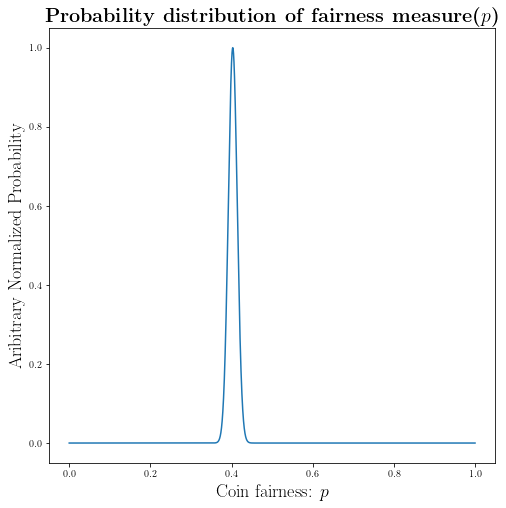

In [11]:
fig_p = plt.figure(figsize=(8,8))

# Just normalizing the probability to maximum value so most likely value corresponds to 1.
# For getting the through probability we need to find the Integral of the un-normalized distribution.

plt.plot(prior_p, prob_p_cat/max(prob_p_cat),  markersize=1)

plt.title(r"\textbf{Probability distribution of fairness measure($p$)}", fontsize=20)

plt.xlabel(r"Coin fairness: $p$", fontsize=18)
plt.ylabel(r"Aribitrary Normalized Probability", fontsize=18)


plt.show()

<span style="color:	#00008B">As you can see from our experiment we found the distribution of the interest: $P(p|X)$</span>

### <span style="color:	#E52B1D">_**Result:**_</span>

<span style="color:	#E52B1D">The **most likely value** for the fairness of the coin is $0.403$, which shows that our coin is **biased** toward getting **tail**.</span>

<hr>

# **What is the numerical value of $\pi$?**

## There is a simple geometric approach we can use:


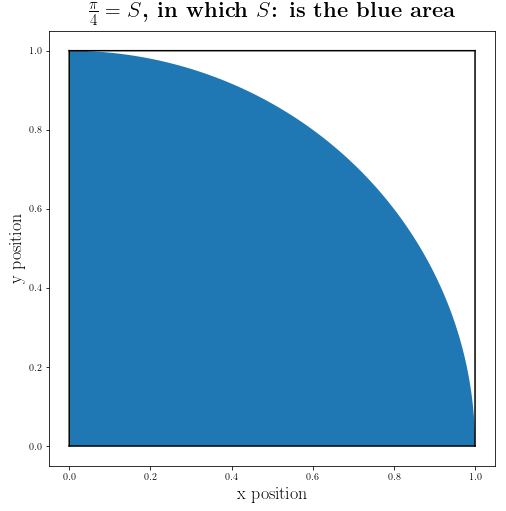

In [12]:
fig_pi = plt.figure(figsize=(8,8))


from matplotlib.patches import Rectangle
_number_of_points_=10**6

x = np.linspace(0,1, _number_of_points_)
y = np.sqrt(1-x**2)
# Plot the circle
plt.fill_between(x,y)

# There are more sophisticated ways to do this as well!
# Making the square
y1 = np.ones(10**6)
y2 = np.zeros(10**6)

# make the square plot
plt.plot(x, y1, "k")
plt.plot(x, y2, "k")
plt.plot(y2, x, "k")
plt.plot(y1, x, "k")


plt.title(r"\textbf{$\frac{\pi}{4}=S$, in which $S$: is the blue area}", fontsize=22)

plt.xlabel(r"x position", fontsize=18)
plt.ylabel(r"y position", fontsize=18)


plt.show()

So if we somehow manage to find the blue area we can find the numerical value for $\pi$. 

\begin{align*}
& S = \frac{\pi R^2}{4} = \frac{\pi}{4} \quad \textrm{Since we know $R=1$} \\
& \pi = 4S \quad \textrm{So we need S}
\end{align*}

### <span style="color:	#E52B1D">How can we find the area numerically?</span> 

First we need to get familiar with the [**Monte Carlo Simulations**](https://en.wikipedia.org/wiki/Monte_Carlo_method)

The **Monte Carlo** simulations, is a statistical technique to model stochastic (or probabilistic) systems and to find the probability of different outcome. 

Further references:
[http://mathworld.wolfram.com/MonteCarloMethod.html](http://mathworld.wolfram.com/MonteCarloMethod.html)

### First let's start with making $N$ random $(x,y)$ points from $[0,1]$ range:

In [13]:
N = 10e4
N = int(N)

x = np.random.random(N)
y = np.random.random(N)

Now we calculate the distance of each point from $(0,0)$: distance function --> d((x,y), (0,0))

In [14]:
distance_from_0_0 = np.sqrt(x**2 + y**2)

Let's count number of points with $d((x,y), (0,0)) \leq 1$

In [15]:
circle_points = distance_from_0_0[distance_from_0_0<=1]

Now we have an array of distances for points inside the circle ($d((x,y), (0,0)) \leq 1$):

If we define $n$ to be the number of points within circle, and $N$ to be total number of points,
We can find the area to be: 

\begin{equation*}
S = \frac{n}{N}
\end{equation*}

In [16]:
PI = 4 * len(circle_points)/len(distance_from_0_0)

print(PI)

3.14988


As you can see we are getting close to the **True value**.

Let's put the above procedures inside a function: 

In [17]:
def our_PI_generator(N=10e5):
    """This is our generic code for approximating pi ~ 3.14 with Monte Carlo simulation"""
    import numpy as np
    # initializing
    N = int(N)
    # Produce random numbers between [0,1] for (x,y)
    x = np.random.random(N)
    y = np.random.random(N)
    # Find the distance of (x,y) from [0,0]
    distance_from_0_0 = np.sqrt(x**2 + y**2)
    # imposing the condition for the circle:  distance((x,y),(0,0))<= 0 
    circle_points = distance_from_0_0[distance_from_0_0<=1]
    return 4 * len(circle_points)/N
    
    

In [18]:
our_PI_generator(10e7)

3.14160396

Let's use different number of points to see how adding to the number of points changes our numerical estimate for $\pi$:

In [19]:
np.logspace(2, 6, 10)

array([1.00000000e+02, 2.78255940e+02, 7.74263683e+02, 2.15443469e+03,
       5.99484250e+03, 1.66810054e+04, 4.64158883e+04, 1.29154967e+05,
       3.59381366e+05, 1.00000000e+06])

In [20]:
I =  np.logspace(2, 6, 5000)
I = np.array([int(i) for i in I])

_x_ = [our_PI_generator(i) for i in I]

Here we assume the true value of $\pi$ is coming from `numpy.pi`. Let's find the errors of our estimates:

In [21]:
distance_from_pi = np.array(_x_)-np.pi

This is how our estimate errors change with different number of points.

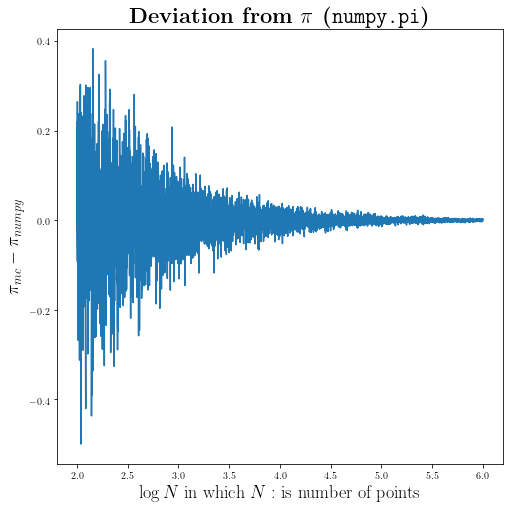

In [22]:
fig2 = plt.figure(figsize=(8,8))
plt.plot(np.log10(I), distance_from_pi)

plt.title(r"\textbf{Deviation from $\pi$ (\texttt{numpy.pi})}", fontsize=22)
plt.xlabel(r"$\log{N}$ in which $N: $ is number of points", fontsize=18)
plt.ylabel(r"$\pi_{mc}-\pi_{numpy}$", fontsize=18)

plt.show()

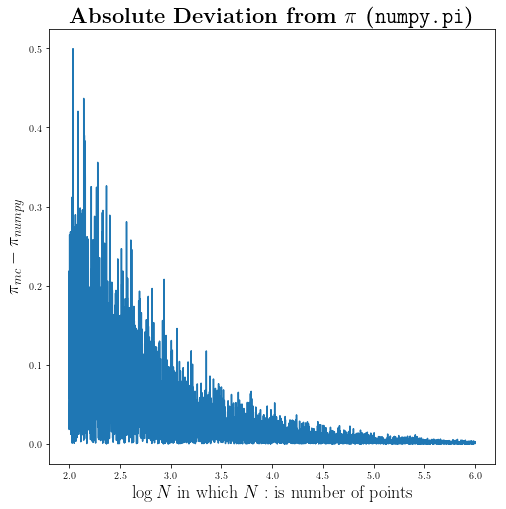

In [23]:
fig2 = plt.figure(figsize=(8,8))
plt.plot(np.log10(I), abs(distance_from_pi))

plt.title(r"\textbf{Absolute Deviation from $\pi$ (\texttt{numpy.pi})}", fontsize=22)
plt.xlabel(r"$\log{N}$ in which $N: $ is number of points", fontsize=18)
plt.ylabel(r"$\pi_{mc}-\pi_{numpy}$", fontsize=18)

plt.show()

### <span style="color:	#E52B1D">And as you would expect we are getting better and better by adding more points</span>

Let's put the selection criteria of the circle inside a function. (This can be generalize easily to any arbitrary geometric criteria)

In [100]:
def impose_circle(distances, radius=1):
    """
    This is the function that takes an array `[distances]` and a number (radius) and output an array 
    of the similar size, and for those value<radius, assigns 1 and the rest 0
    """
    try:
        lenght_of_array = len(distances)
    except TypeError:
        lenght_of_array = 1
        
    selector=np.zeros(lenght_of_array)
    for i in range(lenght_of_array):
        if distances[i]<=radius:
            selector[i] = 1
    return selector

Now let's divide our points into two dictionaries: `inside_points` and `outside_points` 

In [83]:
selector = impose_circle(distance_from_0_0)

inside_points, outside_points = {}, {}

inside_points["x"] = x[selector==1]
inside_points["y"] = y[selector==1]

outside_points["x"] = x[selector==0]
outside_points["y"] = y[selector==0]

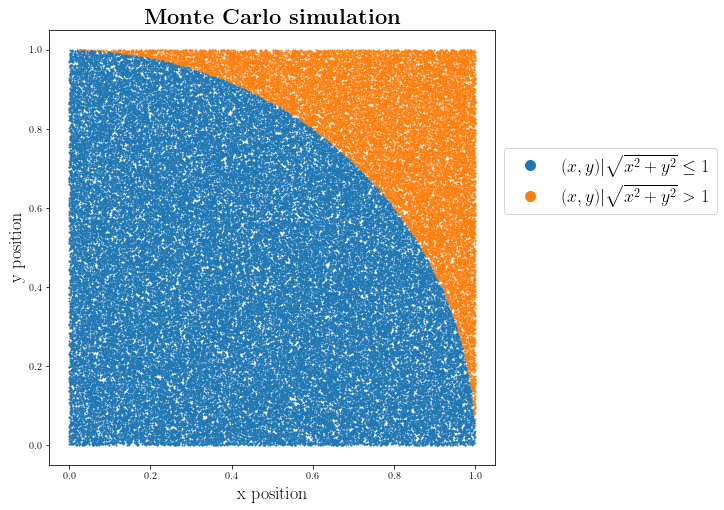

In [84]:
fig = plt.figure(figsize=(8,8))

plt.plot(inside_points["x"], inside_points["y"], '.', markersize=2, label=r"$(x,y) | \sqrt{x^2+y^2} \leq 1 $")
plt.plot(outside_points["x"], outside_points["y"], '.', markersize=2, label=r"$(x,y) | \sqrt{x^2+y^2} > 1 $")

plt.title(r"\textbf{Monte Carlo simulation}", fontsize=22)

plt.xlabel(r"x position", fontsize=18)
plt.ylabel(r"y position", fontsize=18)

plt.legend(bbox_to_anchor=(1, 0.75), fontsize=18, markerscale=10)


plt.show()

### <span style="color:	#E52B1D">This is how our Monte Carlo simulation actually look like!</span>

### Finding the area using **Monte Carlo** simulation:

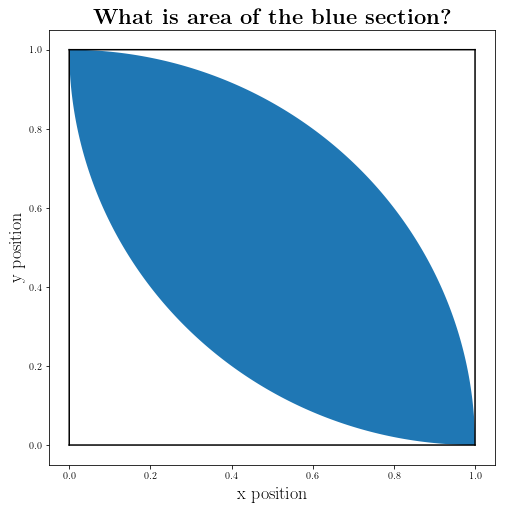

In [89]:
fig_pi = plt.figure(figsize=(8,8))


from matplotlib.patches import Rectangle
_number_of_points_=10**6

x = np.linspace(0,1, _number_of_points_)
# defing our curves (circle R^2 = X^2 + Y^2)
y = np.sqrt(1-x**2)
_y_ = 1 - np.sqrt(1-(x-1)**2)
# Fill the area between two circles
plt.fill_between(x,y,_y_)

# Making the square
y1 = np.ones(10**6)
y2 = np.zeros(10**6)

# make the square plot
plt.plot(x, y1, "k")
plt.plot(x, y2, "k")
plt.plot(y2, x, "k")
plt.plot(y1, x, "k")


plt.title(r"\textbf{What is area of the blue section?}", fontsize=22)

plt.xlabel(r"x position", fontsize=18)
plt.ylabel(r"y position", fontsize=18)


plt.show()

Let's do some **Monte Carlo** simulation again:

In [91]:
N = 10e4
N = int(N)

# Points from (0,0)
x = np.random.random(N)
y = np.random.random(N)

dis=np.sqrt(x**2+y**2)

# Points frome (1,1)
x_1= np.ones(N)-x
y_1= np.ones(N)-y

dis1=np.sqrt(x_1**2+y_1**2)

Now that we have our points let's apply the criteria:

In [93]:
selector=impose_circle(dis)
selector1=impose_circle(dis1)

In [94]:
final_sel = selector1*selector

In [95]:
_inside_points, _outside_points = {}, {}

_inside_points["x"] = x[final_sel==1]
_inside_points["y"] = y[final_sel==1]

_outside_points["x"] = x[final_sel==0]
_outside_points["y"] = y[final_sel==0]

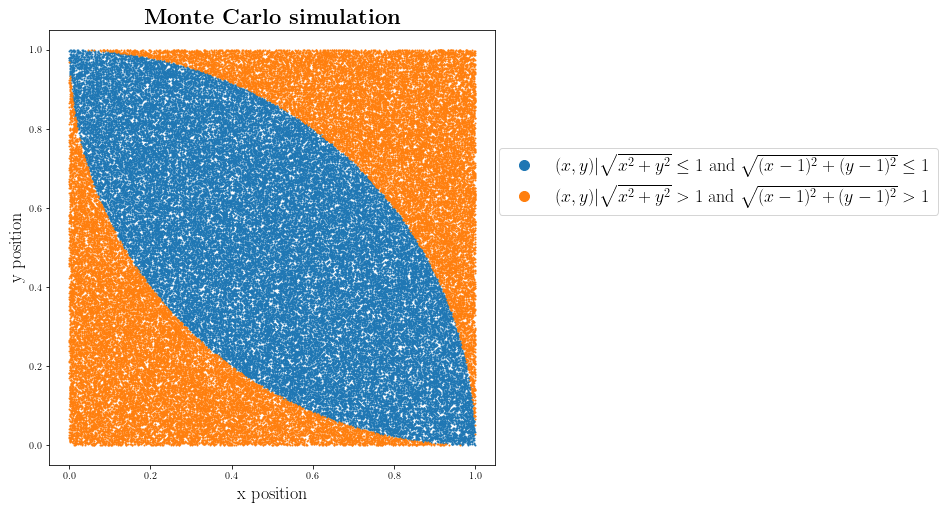

In [96]:
fig = plt.figure(figsize=(8,8))

plt.plot(_inside_points["x"], _inside_points["y"], '.', markersize=2, label=r"$(x,y) | \sqrt{x^2+y^2} \leq 1$ and $\sqrt{(x-1)^2+(y-1)^2} \leq 1$")
plt.plot(_outside_points["x"], _outside_points["y"], '.', markersize=2, label=r"$(x,y) | \sqrt{x^2+y^2} > 1 $ and $\sqrt{(x-1)^2+(y-1)^2} > 1$")

plt.title(r"\textbf{Monte Carlo simulation}", fontsize=22)

plt.xlabel(r"x position", fontsize=18)
plt.ylabel(r"y position", fontsize=18)

plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.75), fontsize=18, markerscale=10)


plt.show()

In [97]:
area_of_middle = len(_inside_points["x"])/len(x)
area_of_middle

0.56885

### Finding the Area geometrically:

Let's find the area for the part of square that we took fourth of a circle ($A_{extra}$) from and take two of them from the area of a square.

$A_{extra} = A_{square}-\frac{A_{circle}}{4}$

The area that we are looking for becomes:

$A_{shape} = A_{square} - 2 A_{extra}$

Let's plug in known quantities:
$A_{shape} = R^2 - 2(R^2 - \frac{\pi R^2}{4})$

\begin{equation*}
A_{shape} = R^2 (\frac{\pi}{2}-1)
\end{equation*}

for special case of $R=1$ it becomes:

\begin{equation*}
A_{shape} =\frac{\pi}{2}-1
\end{equation*}

Coding directly to find the area: (above calculation is inside the code)

In [98]:
area_curve = 1 - np.pi/4
two_curved_area = 2*area_curve

area_of_middle_geometry = 1 - two_curved_area
area_of_middle_geometry

0.5707963267948966

Using the formula directly:

In [99]:
np.pi/2-1

0.5707963267948966

### <span style="color:	#E52B1D">And as you would expect all of these methods are giving us consistent results</span>